In [ ]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import IPython                    # Play audio files.
import librosa                    # Music and audio analysis.
import librosa.display            # Data visualization
import matplotlib.pyplot as plt   # Data visualization.
import numpy as np                # Data wrangling.
import os                         # Manipulate operating system interfaces.
import pandas as pd               # Data handling.
import pickle                     # Python object serialization.
import plotly.express as px       # Data visualization
import plotly.graph_objects as go # Data visualization
import seaborn as sns             # Data visualization.
sns.set()
import warnings                   # Ignore all warnings.
warnings.filterwarnings('ignore')

!pip3 install antropy
from antropy import spectral_entropy             # Spectral entropy.               # Keras utilities.
from keras.utils import to_categorical  # Convert a class vector (integers) to binary class matrix.
from sklearn.preprocessing import LabelEncoder   # To encode target labels with value between 0 and n_classes-1.
from sklearn.preprocessing import StandardScaler # To perform standardization by centering and scaling.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, multilabel_confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split # To split data in training/validating/testing.
from statistics import mode                          # Find the most likely predicted emotion.
from tensorflow.keras import models                  # Group layers into an object with training and inference features.
from tensorflow.keras import layers                  # Keras layers API.
from tensorflow.keras.callbacks import EarlyStopping     # Stop training when a monitored metric has stopped improving.
from tensorflow.keras.callbacks import ReduceLROnPlateau # Reduce learning rate when a metric has stopped improving.
from tensorflow.keras.models import load_model           # To load the model.
from tqdm.auto import tqdm                               # Progress bar.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
classes = ['Angry', 'Happy', 'Neutral', 'Sad','Surprise']

# Prediction Code

In [ ]:
def predict_audio_class(audio_path):
    # Preprocess the audio

    # Make predictions

    predicted_class = classes[np.argmax(audio_path)]

    return predicted_class

In [ ]:
Features = pd.read_csv('/content/drive/MyDrive/New_Features.csv')
Features.dropna(axis=0, inplace=True)

In [ ]:
Features

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,Emotions
0,-486.931915,115.747589,-25.467674,21.137320,1.408364,-17.748659,-5.206296,-11.816609,-23.193365,-10.483434,...,2.684004,1.193644,0.667046,1.682799,0.851160,2.059097,2.655259,2.365323,1.567272,sad
1,-367.653098,51.456189,-7.431012,8.862830,3.618621,-9.529161,-3.643618,-8.304170,-15.196855,-7.301020,...,1.663208,0.625806,0.628800,0.854082,0.712985,1.477681,1.795986,1.884532,0.543469,sad
2,-515.659546,122.350647,-35.442883,21.665054,1.273824,-19.084095,-5.192123,-11.303168,-24.574680,-9.924925,...,2.288218,1.062004,0.062848,0.819858,0.794714,2.296548,2.224104,1.458949,0.318544,sad
3,-488.749237,117.429085,-26.239363,21.227299,1.340673,-17.568041,-5.151507,-11.720846,-23.201389,-10.467696,...,2.690360,1.208868,0.646383,1.663345,0.810789,1.990698,2.632470,2.322598,1.532249,sad
4,-493.752899,112.388176,-30.887045,21.112549,-2.789590,-20.413330,-5.707886,-15.405882,-24.188908,-8.290537,...,0.317027,0.240678,2.419023,2.192997,2.548210,2.053862,1.340124,0.460897,-0.074510,sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45264,-367.356323,59.965549,7.699082,10.579291,1.420210,-1.515012,-3.538505,0.960856,-7.773746,1.731510,...,1.201146,0.758636,0.176617,-1.040748,0.108521,-0.471224,0.929526,-0.373240,2.078353,happy
45265,-357.012695,59.367874,9.643609,13.521070,3.559073,-1.259370,-2.001130,2.180553,-7.028760,1.883122,...,0.804096,0.045094,0.100957,-1.272632,-0.153842,-0.566802,1.103742,-0.443941,1.989685,happy
45266,-362.840332,59.882999,6.326694,8.220230,0.510714,-1.508667,-1.741256,1.716168,-5.908564,1.563138,...,1.874366,0.319025,0.481077,0.794047,1.280348,0.694584,0.268938,0.624827,0.903542,happy
45267,-379.478882,69.366486,10.753653,12.303340,1.525899,-1.020674,-3.550493,1.462840,-8.037142,2.317529,...,0.326897,-0.408616,-0.156843,-1.334962,-0.167477,-1.207461,0.589822,-0.744816,2.320862,happy


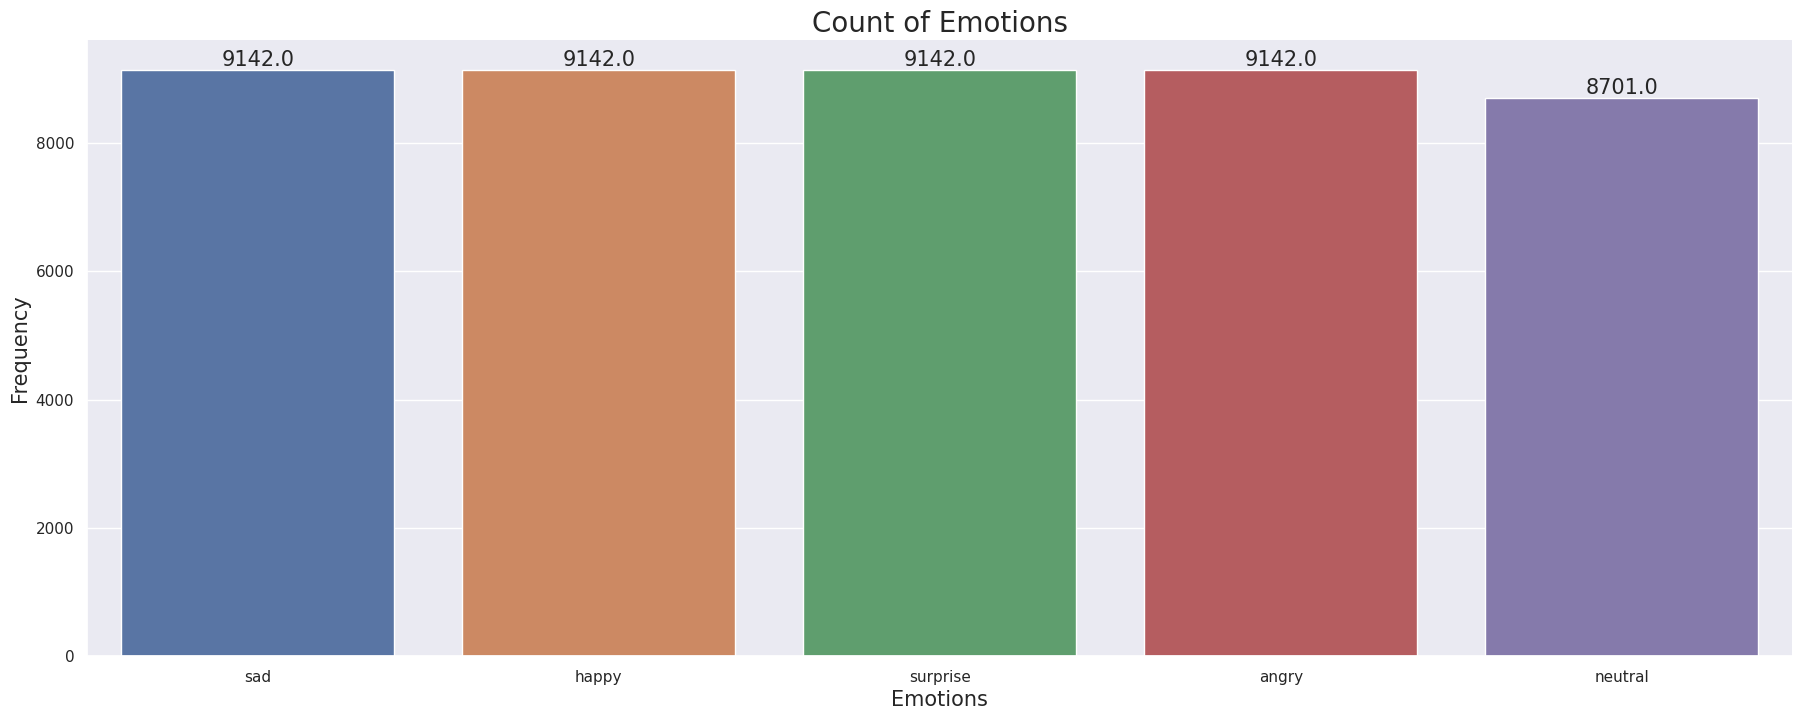

In [ ]:
plt.figure(figsize=(22, 8))
ax = sns.countplot(x=Features.Emotions)

# Add total count labels to each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height, height, ha='center', va='bottom',size = 15)

plt.ylabel('Frequency', size=15)
plt.xlabel('Emotions', size=15)
plt.title('Count of Emotions', size=20)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['Emotions'].values

In [ ]:
Y

array(['sad', 'sad', 'sad', ..., 'happy', 'happy', 'happy'], dtype=object)

In [ ]:
emotions_classes = Features['Emotions'].unique()

In [ ]:
emotions_classes = pd.DataFrame(emotions_classes)

In [ ]:
emotions_classes

,0
0,sad
1,happy
2,surprise
3,angry
4,neutral


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
yy2=pd.get_dummies(Y)

In [ ]:
yy2

,angry,happy,neutral,sad,surprise
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
45264,0,1,0,0,0
45265,0,1,0,0,0
45266,0,1,0,0,0
45267,0,1,0,0,0


In [ ]:
encoder = OneHotEncoder()
Y_res = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
yy=pd.DataFrame(Y_res)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y_res,test_size = 0.2, random_state=42, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((36215, 58), (36215, 5), (9054, 58), (9054, 5))

In [ ]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((36215, 58, 1), (36215, 5), (9054, 58, 1), (9054, 5))

In [ ]:
yy

,0,1,2,3,4
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
45264,0.0,1.0,0.0,0.0,0.0
45265,0.0,1.0,0.0,0.0,0.0
45266,0.0,1.0,0.0,0.0,0.0
45267,0.0,1.0,0.0,0.0,0.0


# Model - 1 (CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, LSTM, Bidirectional
from keras.callbacks import ModelCheckpoint

In [ ]:
model = Sequential()
model.add(layers.Conv1D(512, kernel_size=5, strides=1,
                        padding="same", activation="relu",
                        input_shape=(x_train.shape[1], 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(512, kernel_size=5, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(256, kernel_size=5, strides=1,
                        padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool1D(pool_size=5, strides=2, padding="same"))

model.add(layers.Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(layers.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling1D(pool_size=3, strides = 2, padding = 'same'))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(5, activation="softmax"))


model.compile(optimizer = 'RMSprop' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 58, 512)           3072      
                                                                 
 batch_normalization (BatchN  (None, 58, 512)          2048      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 29, 512)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 29, 512)           1311232   
                                                                 
 batch_normalization_1 (Batc  (None, 29, 512)          2048      
 hNormalization)                                                 
                                                        

In [ ]:
rlrp = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
earlystopping = EarlyStopping(monitor ="val_accuracy",
                              mode = 'auto', patience = 5,
                              restore_best_weights = True)

history=model.fit(x_train, y_train, batch_size=64, epochs=70, validation_data=(x_test, y_test), callbacks=[rlrp,earlystopping])

Epoch 1/70
566/566 [==============================] - 39s 26ms/step - loss: 1.6899 - accuracy: 0.2393 - val_loss: 1.7842 - val_accuracy: 0.2158 - lr: 0.0010
Epoch 2/70
566/566 [==============================] - 9s 16ms/step - loss: 1.5708 - accuracy: 0.2665 - val_loss: 1.5942 - val_accuracy: 0.2761 - lr: 0.0010
Epoch 3/70
566/566 [==============================] - 9s 15ms/step - loss: 1.5266 - accuracy: 0.2950 - val_loss: 1.5131 - val_accuracy: 0.2990 - lr: 0.0010
Epoch 4/70
566/566 [==============================] - 9s 16ms/step - loss: 1.4786 - accuracy: 0.3221 - val_loss: 1.5533 - val_accuracy: 0.2989 - lr: 0.0010
Epoch 5/70
566/566 [==============================] - 9s 16ms/step - loss: 1.4355 - accuracy: 0.3511 - val_loss: 1.4346 - val_accuracy: 0.3486 - lr: 0.0010
Epoch 6/70
566/566 [==============================] - 9s 16ms/step - loss: 1.3738 - accuracy: 0.3877 - val_loss: 1.3891 - val_accuracy: 0.3772 - lr: 0.0010
Epoch 7/70
566/566 [==============================] - 9s 16ms/s

In [ ]:
preds = model.predict(x_test)

283/283 [==============================] - 26s 90ms/step


In [ ]:
preds.shape

(9054, 5)

In [ ]:
preds

array([[9.8562131e-13, 9.9999994e-01, 2.8186159e-10, 1.6682540e-08,
        4.4153183e-09],
       [1.6103312e-03, 5.9900002e-04, 3.9323657e-03, 9.9377388e-01,
        8.4416526e-05],
       [1.7406202e-07, 1.7350161e-06, 7.8732453e-05, 9.9991709e-01,
        2.0981809e-06],
       ...,
       [1.5594756e-13, 3.7762593e-09, 9.9988866e-01, 1.1128828e-04,
        2.3876820e-10],
       [1.1879481e-05, 9.9968839e-01, 2.5241452e-04, 4.6952006e-05,
        4.1180039e-07],
       [2.2854918e-08, 9.9999952e-01, 1.2899741e-09, 4.3786216e-07,
        5.0465114e-12]], dtype=float32)

In [ ]:
np.sum(preds[:10],axis=1)

array([0.99999994, 1.        , 0.9999998 , 1.        , 0.99999994,
       0.9999999 , 0.99999994, 0.9999999 , 0.99999994, 0.99999994],
      dtype=float32)

In [ ]:
y_pred = encoder.inverse_transform(preds)
y_tmp = encoder.inverse_transform(y_test)

In [ ]:
y_pred.shape

(9054, 1)

In [ ]:
# Calculate our accuracy score.
accuracy = accuracy_score(y_tmp, y_pred)

# Calculate our precision score.
precision = precision_score(y_tmp, y_pred, average = 'micro')

# Calculate our recall score.
recall = recall_score(y_tmp, y_pred, average = 'micro')

# Calculate our f1-score.
f1 = f1_score(y_tmp, y_pred, average = 'micro')

# Print each of our scores to inspect performance.
print('Accuracy Score: %f' % (accuracy * 100), '%', sep = '')
print('Precision Score: %f' % (precision * 100), '%', sep = '')
print('Recall Score: %f' % (recall * 100), '%', sep = '')
print('F1 Score: %f' % (f1 * 100), '%', sep = '')

Accuracy Score: 90.269494%
Precision Score: 90.269494%
Recall Score: 90.269494%
F1 Score: 90.269494%


In [ ]:
y_pred[:100]

array([['happy'],
       ['neutral'],
       ['sad'],
       ['angry'],
       ['surprise'],
       ['sad'],
       ['neutral'],
       ['sad'],
       ['happy'],
       ['happy'],
       ['happy'],
       ['neutral'],
       ['surprise'],
       ['surprise'],
       ['angry'],
       ['surprise'],
       ['angry'],
       ['happy'],
       ['happy'],
       ['happy'],
       ['surprise'],
       ['angry'],
       ['surprise'],
       ['sad'],
       ['neutral'],
       ['angry'],
       ['sad'],
       ['neutral'],
       ['neutral'],
       ['angry'],
       ['sad'],
       ['neutral'],
       ['sad'],
       ['happy'],
       ['happy'],
       ['sad'],
       ['surprise'],
       ['happy'],
       ['surprise'],
       ['neutral'],
       ['sad'],
       ['surprise'],
       ['happy'],
       ['happy'],
       ['neutral'],
       ['sad'],
       ['angry'],
       ['surprise'],
       ['sad'],
       ['angry'],
       ['happy'],
       ['angry'],
       ['surprise'],
       ['happy'],

In [ ]:
y_pred[0]

array(['happy'], dtype=object)

In [ ]:
final_df = pd.DataFrame(columns=['PredictedLabels', 'ActualLabels'])
final_df['PredictedLabels'] = y_pred.flatten()
final_df['ActualLabels'] = y_tmp.flatten()

final_df

,PredictedLabels,ActualLabels
0,happy,happy
1,sad,happy
2,sad,sad
3,angry,angry
4,surprise,surprise
...,...,...
9049,neutral,neutral
9050,surprise,surprise
9051,neutral,neutral
9052,happy,happy


In [ ]:
modidf = final_df
classes = modidf.ActualLabels.unique()
classes

array(['happy', 'sad', 'angry', 'surprise', 'neutral'], dtype=object)

In [ ]:
modidf.PredictedLabels.unique()

array(['happy', 'sad', 'angry', 'surprise', 'neutral'], dtype=object)

Accuracy of our model on test data based on emotions:  90.0 %


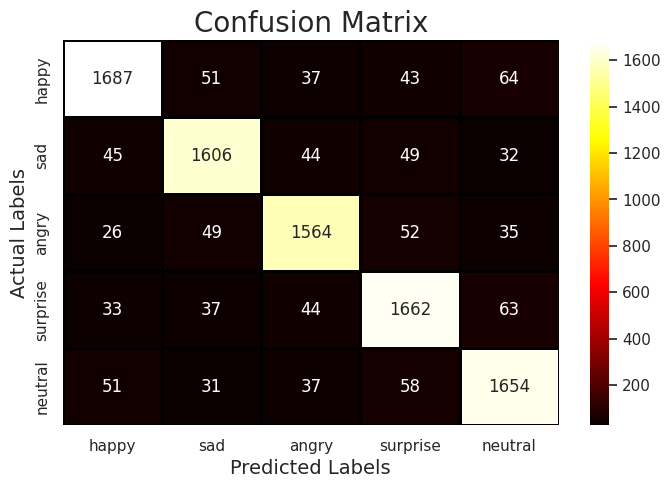

In [ ]:
modidf = final_df


classes = modidf.ActualLabels.unique()


# Confusion matrix
c = confusion_matrix(modidf.ActualLabels, modidf.PredictedLabels)
print("Accuracy of our model on test data based on emotions: " ,round(accuracy_score(modidf.ActualLabels, modidf.PredictedLabels),2)*100,"%")

#cm = confusion_matrix(y_tmp, y_pred)
plt.figure(figsize = (8, 5))
c = pd.DataFrame(c , index = [i for i in modidf['ActualLabels'].unique()] , columns = [i for i in modidf['PredictedLabels'].unique()])
sns.heatmap(c, linecolor='Black', cmap='hot', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(y_pred[0])

['happy']


In [ ]:
y_pred[1]

array(['neutral'], dtype=object)

In [ ]:
model_name = 'Emotion_Model_conv1d.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json = model.to_json()
with open("Emotion_Model_conv1d_gender_93.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at /content/saved_models/Emotion_Model_conv1d.h5 


In [ ]:
model.save('model.h5')

In [ ]:
from keras.models import Sequential, model_from_json

In [ ]:
json_file = open('/content/drive/MyDrive/Emotion_Model_conv1d_gender_93.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

# load weights into new model
model.load_weights("/content/drive/MyDrive/Emotion_Model_conv1d.h5")
print("Loaded model from disk")

# Keras optimiser
model.compile(optimizer = 'RMSprop' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
score = model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 90.27%


In [ ]:
def noise(data):
    data = np.array(data, dtype=float)  # Convert data to a numeric array
    noise_amp = 0.04 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.70):
    return librosa.effects.time_stretch(data,rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

def higher_speed(data, speed_factor = 1.25):
    return librosa.effects.time_stretch(data,rate=speed_factor)

def lower_speed(data, speed_factor = 0.75):
    return librosa.effects.time_stretch(data,rate=speed_factor)

In [ ]:
#sample_rate = 22050

def extract_features(data):

    result = np.array([])

    mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=58)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    result = np.array(mfccs_processed)

    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=3, offset=0.5)

    #without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    #noised
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    #stretched
    stretch_data = stretch(data)
    res3 = extract_features(stretch_data)
    result = np.vstack((result, res3))

    #shifted
    shift_data = shift(data)
    res4 = extract_features(shift_data)
    result = np.vstack((result, res4))

    #pitched
    pitch_data = pitch(data, sample_rate)
    res5 = extract_features(pitch_data)
    result = np.vstack((result, res5))

    #speed up
    higher_speed_data = higher_speed(data)
    res6 = extract_features(higher_speed_data)
    result = np.vstack((result, res6))

    #speed down
    lower_speed_data = higher_speed(data)
    res7 = extract_features(lower_speed_data)
    result = np.vstack((result, res7))

    return result

In [ ]:
sound_file_path = '/content/drive/MyDrive/M_03_ILIAS_S_7_SAD_3.wav'
features_test = sound_file_path

In [ ]:
x_test2=get_features(features_test)

In [ ]:
x_test2.shape

(7, 58)

In [ ]:
x_test2 = np.expand_dims(x_test2, axis=2)

In [ ]:
x_test2.shape

(7, 58, 1)

In [ ]:
def predict(path):
    classes = ['Angry', 'Happy', 'Neutral', 'Sad','Surprise']  # Replace with your own class labels
    pred=(model.predict(path))
    y_pred = encoder.inverse_transform(pred)
    print(y_pred)


In [ ]:
# Each audio data extraction has its own ndarray.
predict(x_test2)

1/1 [==============================] - 0s 381ms/step
[['sad']
 ['sad']
 ['sad']
 ['sad']
 ['sad']
 ['sad']
 ['sad']]


#Model-2 (RNN-LSTM)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
timesteps = x_train.shape[1]  # Number of time steps in each sequence
input_dim = x_train.shape[2]  # Number of features in each time step
output_dim = y_train.shape[1]

In [ ]:
model = Sequential()

# Add the first LSTM layer with input shape (timesteps, input_dim)
model.add(LSTM(units=256, return_sequences=True, input_shape=(timesteps, input_dim)))
model.add(Dropout(0.2))

# Add additional LSTM layers
model.add(LSTM(units=256, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=256, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=256, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=256, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=256, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=256))
model.add(Dropout(0.2))

# Add a dense layer for output prediction
model.add(Dense(units=output_dim, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 58, 256)           264192    
                                                                 
 dropout_8 (Dropout)         (None, 58, 256)           0         
                                                                 
 lstm_9 (LSTM)               (None, 58, 256)           525312    
                                                                 
 dropout_9 (Dropout)         (None, 58, 256)           0         
                                                                 
 lstm_10 (LSTM)              (None, 58, 256)           525312    
                                                                 
 dropout_10 (Dropout)        (None, 58, 256)           0         
                                                                 
 lstm_11 (LSTM)              (None, 58, 256)          

In [ ]:
rlrp = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
earlystopping = EarlyStopping(monitor ="val_accuracy",
                              mode = 'auto', patience = 5,
                              restore_best_weights = True)

history=model.fit(x_train, y_train, batch_size=64, epochs=200, validation_data=(x_test, y_test), callbacks=[rlrp,earlystopping])

Epoch 1/200
566/566 [==============================] - 26s 45ms/step - loss: 1.0528 - accuracy: 0.5511 - val_loss: 1.1676 - val_accuracy: 0.5125 - lr: 1.2500e-04
Epoch 2/200
566/566 [==============================] - 26s 45ms/step - loss: 1.0464 - accuracy: 0.5537 - val_loss: 1.1513 - val_accuracy: 0.5136 - lr: 1.2500e-04
Epoch 3/200
566/566 [==============================] - 26s 46ms/step - loss: 1.0343 - accuracy: 0.5592 - val_loss: 1.1532 - val_accuracy: 0.5178 - lr: 1.2500e-04
Epoch 4/200
566/566 [==============================] - 26s 45ms/step - loss: 1.0219 - accuracy: 0.5654 - val_loss: 1.1422 - val_accuracy: 0.5251 - lr: 1.2500e-04
Epoch 5/200
566/566 [==============================] - 25s 45ms/step - loss: 1.0077 - accuracy: 0.5732 - val_loss: 1.1387 - val_accuracy: 0.5276 - lr: 1.2500e-04
Epoch 6/200
566/566 [==============================] - 25s 45ms/step - loss: 0.9999 - accuracy: 0.5767 - val_loss: 1.1408 - val_accuracy: 0.5284 - lr: 1.2500e-04
Epoch 7/200
566/566 [=======

283/283 [==============================] - 5s 16ms/step - loss: 0.7737 - accuracy: 0.8174
Accuracy of our model on test data :  81.74 %


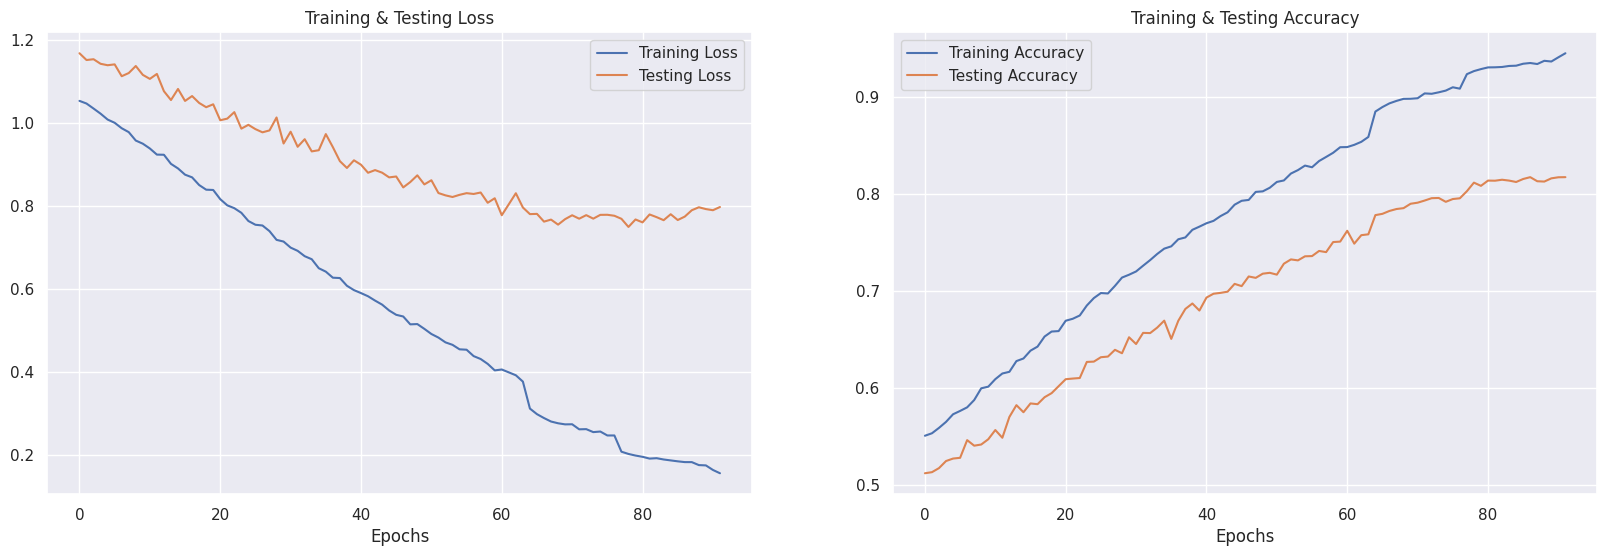

In [ ]:
print("Accuracy of our model on test data : " , round(model.evaluate(x_test,y_test)[1]*100,2) , "%")

epochs = [i for i in range(92)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

#Model-3 (Bi-LSTM)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, Dense

In [ ]:
# Define the number of hidden layers and units per layer
num_hidden_layers = 7
units_per_layer = 256

# Create the model
model = Sequential()

# Add the first Bi-LSTM layer with input_shape
model.add(Bidirectional(LSTM(units_per_layer, return_sequences=True), input_shape=(None, input_dim)))

# Add the remaining hidden layers
for _ in range(num_hidden_layers - 1):
    model.add(Bidirectional(LSTM(units_per_layer, return_sequences=True)))

# Add the output layer
model.add(Dense(output_dim, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

In [ ]:
print("Accuracy of our model on test data : " , round(model.evaluate(x_test,y_test)[1]*100,2) , "%")

epochs = [i for i in range(48)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()